In [17]:
import skimage

import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from skimage import exposure
from skimage.feature import canny
from scipy import ndimage as ndi
from skimage import filters
from skimage import img_as_ubyte

In [3]:
def imageHistogram(myImage):
    if isinstance(myImage,(np.ndarray)):
        myImage = Image.fromarray(myImage)
    plt.hist(list(myImage.getdata()), bins=255, range=(0,255))
    plt.show()

In [4]:
def histogramEqualization(myImage):
    equalizedImage= exposure.equalize_hist(myImage)
    #skimage.io.imshow(equalizedImage)
    return equalizedImage

In [5]:
def histogramAdaptEqualization(myImage):
    adaptedImage = exposure.equalize_adapthist(myImage)
    return adaptedImage

[[116 119 127 ... 226 219 232]
 [108 108 112 ... 226 226 236]
 [112 108 108 ... 219 219 232]
 ...
 [ 82  81  81 ... 150 166 166]
 [ 81  79  78 ... 150 157 161]
 [ 81  79  78 ... 161 157 172]]


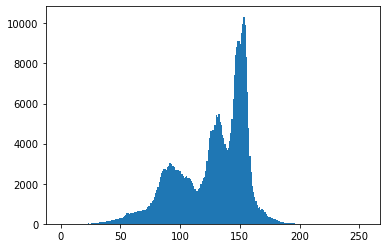

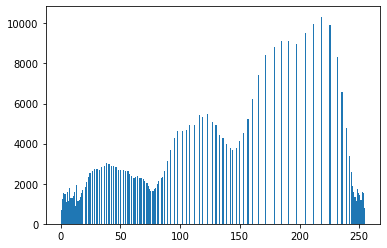

In [21]:
myImage = skimage.io.imread(r"Malarai_5slices_sl1_ch1_p1_t1_copy.jpeg")
he = histogramEqualization(myImage)
eb = img_as_ubyte(he)
print(eb)
hist1 = imageHistogram(myImage)
plt.hist(eb.ravel(), bins=256)
plt.show()

In [ ]:
from matplotlib.pyplot import figure
img = skimage.io.imread(r"Malarai_5slices_sl1_ch1_p1_t1_copy.jpeg")
img_eq = exposure.equalize_hist(img)

img2 = skimage.io.imread(r"Malarai_5slices_sl1_ch1_p1_t1_copy.jpeg")
img_adapt_hist = exposure.equalize_adapthist(img2)


hist, axes = plt.subplots(2, figsize=(16,12))

axes[0].imshow(img_adapt_hist, cmap='gray')
axes[1].imshow(img_eq, cmap='gray')

In [ ]:
image = skimage.io.imread('Malarai_5slices_sl1_ch1_p1_t1_copy.jpeg')
edges = canny(image, 2,1,25)
#skimage.io.imshow(edges)
segmentEdges = ndi.binary_fill_holes(edges)
skimage.io.imshow(segmentEdges)

In [ ]:
def thresholdImage2(picture):
    image_threshold = filters.threshold_otsu(picture)
    image_array = picture < image_threshold
    imageHistogram(image_array)
    return image_array
    

In [ ]:
read_image = skimage.io.imread("Malarai_5slices_sl1_ch1_p1_t1_copy.jpeg")
original_thresholded=thresholdImage2(read_image)
equalized_image=histogramEqualization(read_image)
adapted_image=histogramAdaptEqualization(read_image)
thresholded_image=thresholdImage2(equalized_image)
thresholded_image2=thresholdImage2(adapted_image)
segment_edges = ndi.binary_fill_holes(thresholded_image)
segment_edges2 = ndi.binary_fill_holes(original_thresholded)
segment_edges3 = ndi.binary_fill_holes(thresholded_image2)

hist, axes = plt.subplots(9, figsize=(64,48))
axes[0].imshow(read_image, cmap='gray')
axes[1].imshow(original_thresholded, cmap='gray')
axes[2].imshow(segment_edges2, cmap='gray')
axes[3].imshow(equalized_image, cmap='gray')
axes[4].imshow(thresholded_image, cmap='gray')
axes[5].imshow(segment_edges, cmap='gray')
axes[6].imshow(adapted_image, cmap='gray')
axes[7].imshow(thresholded_image2, cmap='gray')
axes[8].imshow(segment_edges3, cmap='gray')

In [ ]:
img = skimage.io.imread('/Users/reganlamoureux/Downloads/troph.tif')
eq_img= exposure.equalize_hist(img)
ax1 = plt.subplot(131)
ax1.imshow(img)
ax2 = plt.subplot(132)
ax2.imshow(eq_img)